In [11]:
import pandas as pd
import matplotlib.pyplot as pp

df = pd.read_csv('confirmed-cases-since-120864.csv')
#show df fitst 5 rows
df.head()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,816990,12/8/2021,11/8/2021,ชาย,7.0,ปี,Thailand,เชียงราย,อื่นๆ,NaN,NaN
1,816991,12/8/2021,11/8/2021,ชาย,1.0,ปี,Thailand,เชียงราย,อื่นๆ,NaN,NaN
2,816992,12/8/2021,11/8/2021,ชาย,35.0,ปี,Thailand,เชียงราย,อื่นๆ,NaN,NaN
3,816993,12/8/2021,11/8/2021,หญิง,33.0,ปี,Thailand,เชียงราย,อื่นๆ,NaN,NaN
4,816994,12/8/2021,11/8/2021,หญิง,14.0,ปี,Thailand,เชียงราย,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,NaN,NaN


In [6]:
df_cut = df[['No.','announce_date','sex','age','province_of_isolation','risk']]
df_cut.head()

,No.,announce_date,sex,age,province_of_isolation,risk
0,816990,12/8/2021,ชาย,7.0,เชียงราย,อื่นๆ
1,816991,12/8/2021,ชาย,1.0,เชียงราย,อื่นๆ
2,816992,12/8/2021,ชาย,35.0,เชียงราย,อื่นๆ
3,816993,12/8/2021,หญิง,33.0,เชียงราย,อื่นๆ
4,816994,12/8/2021,หญิง,14.0,เชียงราย,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้


In [7]:
#Ratio of risk
df_cut['risk'].value_counts()

risk
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้                                       88413
อื่นๆ                                                                             52893
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน                                  29868
อยู่ระหว่างการสอบสวน                                                              25537
ระบุไม่ได้                                                                         5531
สถานที่ทำงาน                                                                       3918
ทัณฑสถาน/เรือนจำ                                                                   3164
ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว                                      2191
บุคลากรด้านการแพทย์และสาธารณสุข                                                     897
อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงานใกล้ชิดสัมผัสชาวต่างชาติ เป็นต้น      373
ตรวจก่อนทำหัตถการ                                                                   238
ปอดอักเสบ (Pneumonia)      

In [9]:
#Static of age
df_cut['age'].describe()

count    198386.000000
mean         36.174134
std          17.732531
min           1.000000
25%          24.000000
50%          35.000000
75%          48.000000
max         119.000000
Name: age, dtype: float64

<Axes: >

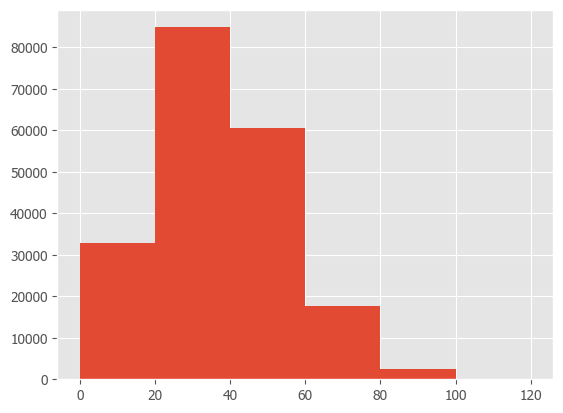

In [34]:
#Age range
pp.style.use('ggplot')
pp.rcParams['font.family'] = 'tahoma'
df_cut['age'].hist(bins=[0,20,40,60,80,100,120])

<Axes: xlabel='sex'>

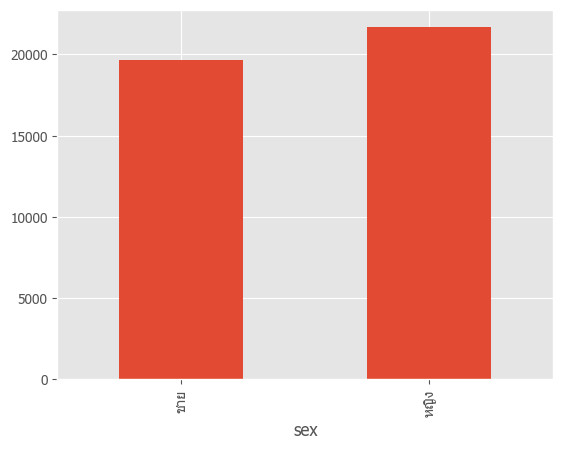

In [29]:
#How many infested in my province separate by sex
df_ans = df_cut.loc[df_cut['province_of_isolation'] == 'กรุงเทพมหานคร']
df_ans2 = df_cut.query("province_of_isolation == 'กรุงเทพมหานคร'")
df_ans3 = df_cut[df_cut['province_of_isolation'] == 'กรุงเทพมหานคร']
#All options are the same
df_ans.groupby('sex').count()['No.'].plot.bar()


<Axes: xlabel='date'>

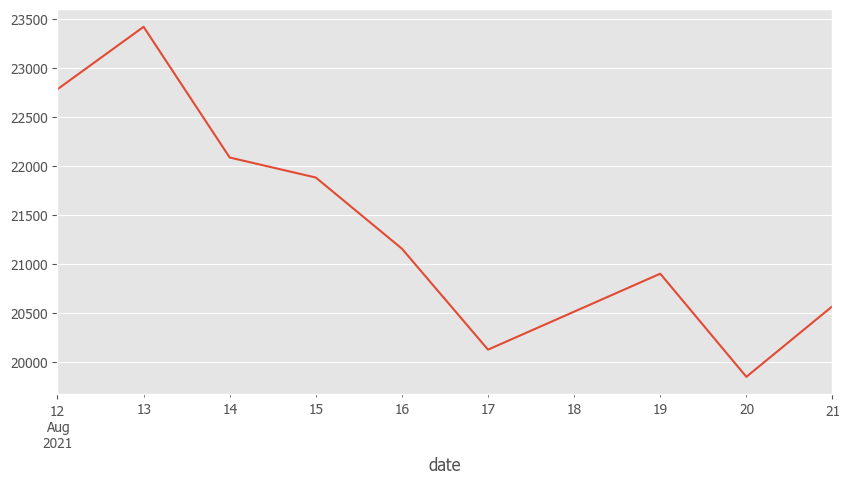

In [33]:
#How to know trends by day
df_cut['date'] = pd.to_datetime(df_cut['announce_date'],format='%d/%m/%Y')
df_cut.groupby('date').count()['No.'].plot.line(figsize=(10,5))

<Axes: xlabel='จังหวัด'>

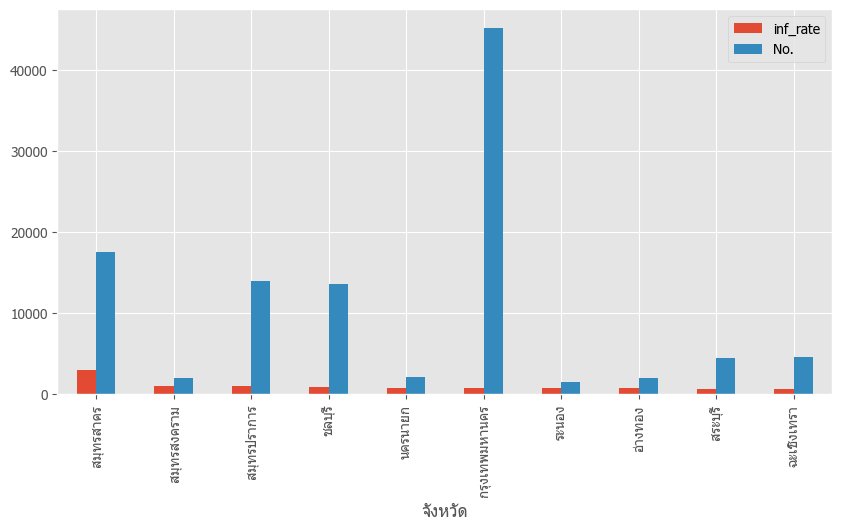

In [75]:
#Find infest rate
pop_df = pd.read_csv('thai_population_63.csv')
pop_df = pop_df[['จังหวัด','รวม']]

#change กทม. to กรุงเทพมหานคร
df_cut['province_of_isolation'] = df_cut['province_of_isolation'].replace('กทม','กรุงเทพมหานคร')
inf_df = df_cut.groupby('province_of_isolation').count()['No.'].reset_index().sort_values(by='No.',ascending=False)

df_ans4 = pd.merge(inf_df,pop_df,left_on='province_of_isolation',right_on='จังหวัด')

df_ans4['inf_rate'] = df_ans4['No.'] *100000 / df_ans4['รวม']
df_ans4 = df_ans4.set_index('จังหวัด').sort_values(by='inf_rate',ascending=False)

df_ans4[['inf_rate','No.']].head(10).plot.bar(figsize=(10,5))